<a href="https://colab.research.google.com/github/rraar/DataMining/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
dataset = pd.read_csv('insurance.csv')
x = dataset.iloc[:, [0,2]].values
y = dataset.iloc[:, [4]].values

In [47]:
print(x)

[[19.   27.9 ]
 [18.   33.77]
 [28.   33.  ]
 ...
 [18.   36.85]
 [21.   25.8 ]
 [61.   29.07]]


In [58]:
print(y)

[['yes']
 ['no']
 ['no']
 ...
 ['no']
 ['no']
 ['yes']]


In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [61]:
print(y)

[1 0 0 ... 0 0 1]


In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [63]:
print(x_train)

[[32.   29.59]
 [61.   22.04]
 [19.   24.6 ]
 ...
 [40.   25.08]
 [19.   35.53]
 [33.   18.5 ]]


In [64]:
print(x_test)

[[52.    30.2  ]
 [47.    29.37 ]
 [48.    40.565]
 [61.    38.38 ]
 [51.    18.05 ]
 [34.    21.375]
 [18.    26.315]
 [51.    36.385]
 [38.    30.21 ]
 [31.    31.065]
 [34.    19.   ]
 [50.    26.22 ]
 [43.    29.9  ]
 [33.    24.31 ]
 [27.    28.5  ]
 [50.    28.16 ]
 [60.    24.32 ]
 [26.    32.49 ]
 [38.    29.26 ]
 [20.    30.685]
 [51.    24.795]
 [56.    33.82 ]
 [52.    30.875]
 [47.    27.83 ]
 [22.    33.77 ]
 [32.    37.335]
 [28.    17.29 ]
 [40.    33.   ]
 [31.    25.74 ]
 [45.    30.495]
 [40.    28.69 ]
 [59.    41.14 ]
 [62.    37.4  ]
 [55.    37.3  ]
 [24.    20.52 ]
 [30.    27.93 ]
 [46.    38.17 ]
 [28.    36.4  ]
 [40.    32.775]
 [20.    33.3  ]
 [36.    19.855]
 [29.    27.94 ]
 [39.    26.41 ]
 [58.    36.955]
 [18.    36.85 ]
 [21.    32.68 ]
 [50.    27.83 ]
 [42.    26.315]
 [30.    21.945]
 [57.    23.98 ]
 [23.    34.865]
 [19.    27.93 ]
 [48.    28.   ]
 [51.    37.05 ]
 [58.    41.91 ]
 [28.    35.435]
 [26.    35.42 ]
 [50.    26.41 ]
 [43.    25.52

In [65]:
print(y_train)

[0 0 0 ... 0 0 0]


In [66]:
print(y_test)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0
 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0
 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0
 0 1]


In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [68]:
print(x_train)

[[-0.51485346 -0.18133104]
 [ 1.54874618 -1.39313042]
 [-1.43991536 -0.98224215]
 ...
 [ 0.05441541 -0.9052006 ]
 [-1.43991536  0.77205813]
 [-0.44369485 -1.96131184]]


In [69]:
print(x_test)

[[ 0.9083187  -0.08342407]
 [ 0.55252566 -0.21664175]
 [ 0.62368427  1.58019189]
 [ 1.54874618  1.22949233]
 [ 0.8371601  -2.0335383 ]
 [-0.37253624 -1.49986506]
 [-1.51107397 -0.70697912]
 [ 0.8371601   0.90928839]
 [-0.08790181 -0.08181904]
 [-0.58601207  0.05541122]
 [-0.37253624 -1.88106023]
 [ 0.76600149 -0.72222692]
 [ 0.26789123 -0.13157504]
 [-0.44369485 -1.02878809]
 [-0.8706465  -0.35627956]
 [ 0.76600149 -0.41085066]
 [ 1.47758757 -1.02718306]
 [-0.94180511  0.28412832]
 [-0.08790181 -0.23429711]
 [-1.36875676 -0.00558001]
 [ 0.8371601  -0.95094402]
 [ 1.19295314  0.49759761]
 [ 0.9083187   0.02491561]
 [ 0.55252566 -0.46381672]
 [-1.22643954  0.48957245]
 [-0.51485346  1.06176646]
 [-0.79948789 -2.15552075]
 [ 0.05441541  0.36598497]
 [-0.58601207 -0.79926847]
 [ 0.41020845 -0.03607562]
 [ 0.05441541 -0.32578395]
 [ 1.40642896  1.67248124]
 [ 1.61990478  1.07219917]
 [ 1.12179453  1.05614885]
 [-1.08412232 -1.63709532]
 [-0.65717067 -0.4477664 ]
 [ 0.48136705  1.19578666]
 

In [70]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [71]:
y_pred = classifier.predict(x_test)

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[264   0]
 [ 71   0]]


<ipython-input-75-8a13b11e0ada>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


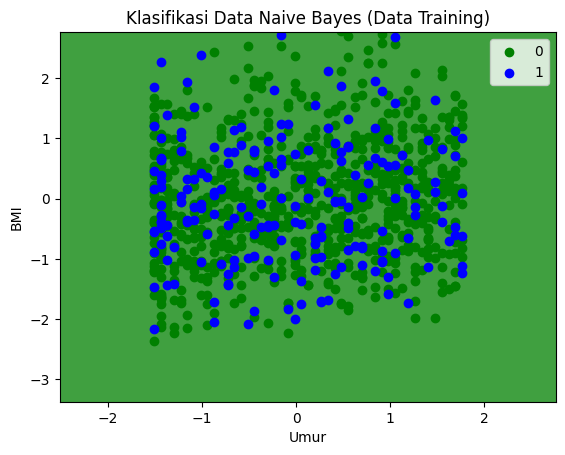

In [75]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max()+1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max()+1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('green', 'blue'))(i), label = j)
plt.title('Klasifikasi Data Naive Bayes (Data Training)')
plt.xlabel('Umur')
plt.ylabel('BMI')
plt.legend()
plt.show()


<ipython-input-76-5ffd71e56296>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


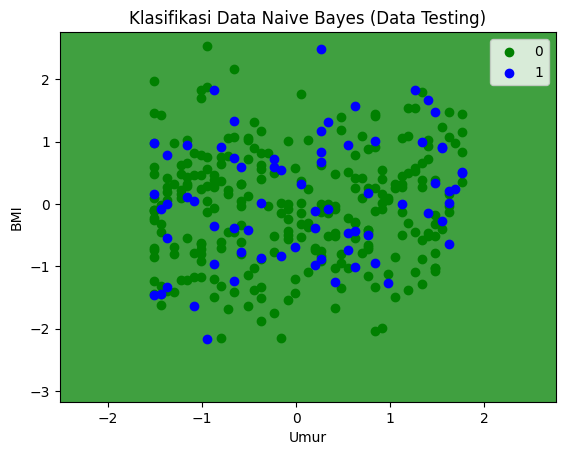

In [76]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max()+1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max()+1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('green', 'blue'))(i), label = j)
plt.title('Klasifikasi Data Naive Bayes (Data Testing)')
plt.xlabel('Umur')
plt.ylabel('BMI')
plt.legend()
plt.show()
